# Linear Regression Work-path 

### NOTES

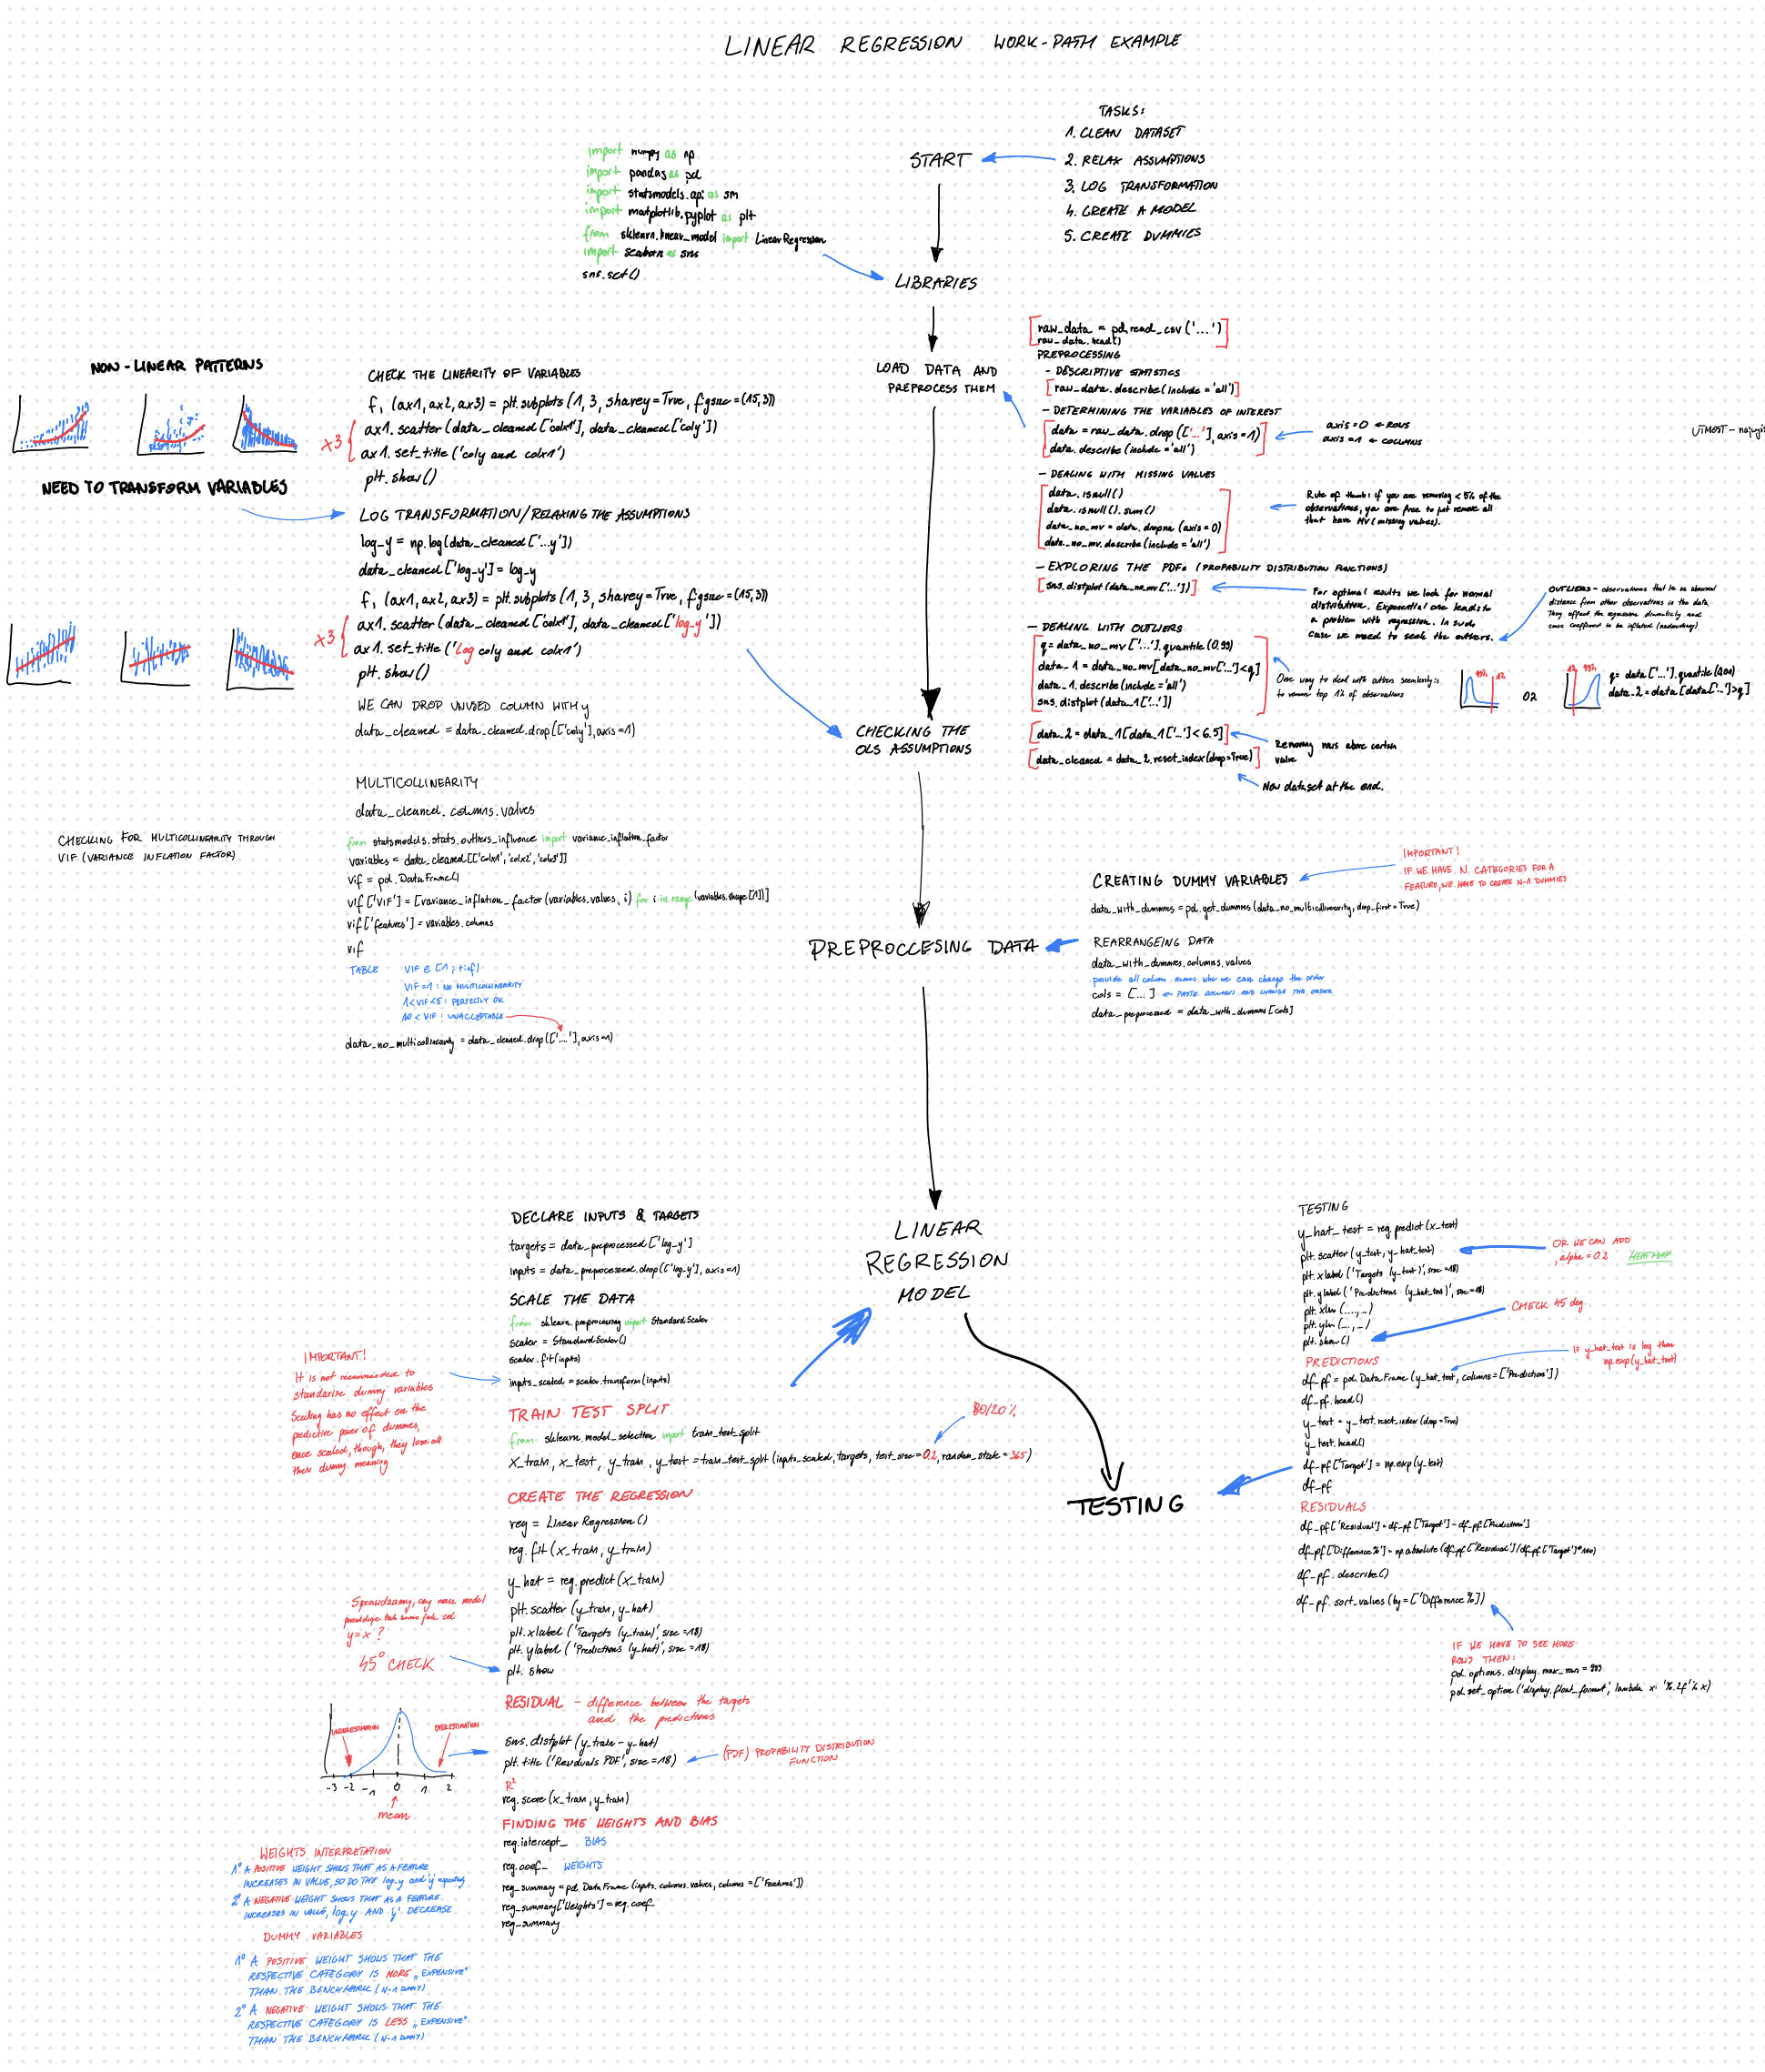

### libs


In [43]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
sns.set()

### DATA

In [44]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [45]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Determining the variables of interest

In [46]:
data = raw_data.drop(['Body','Engine Type','Registration','Model'],axis = 1)
data.describe(include='all')

,Brand,Price,Mileage,EngineV,Year
count,4345,4173.000000,4345.000000,4195.000000,4345.000000
unique,7,NaN,NaN,NaN,NaN
top,Volkswagen,NaN,NaN,NaN,NaN
freq,936,NaN,NaN,NaN,NaN
mean,NaN,19418.746935,161.237284,2.790734,2006.550058
std,NaN,25584.242620,105.705797,5.066437,6.719097
min,NaN,600.000000,0.000000,0.600000,1969.000000
25%,NaN,6999.000000,86.000000,1.800000,2003.000000
50%,NaN,11500.000000,155.000000,2.200000,2008.000000
75%,NaN,21700.000000,230.000000,3.000000,2012.000000


### MISSING VALUES

In [47]:
data_no_mv = data.dropna(axis = 0)

### EXPLORING THE PDFs 

<Axes: xlabel='EngineV', ylabel='Count'>

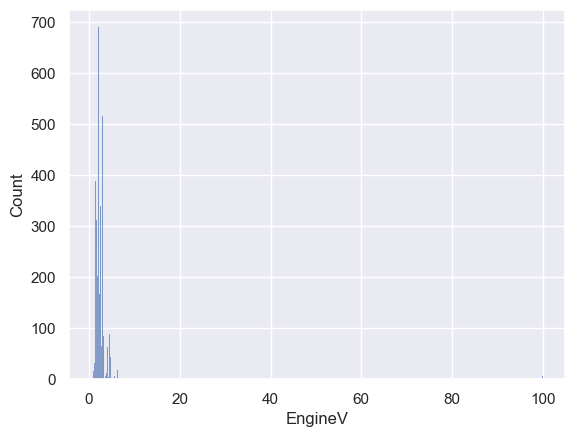

In [48]:
sns.histplot(data_no_mv['EngineV'])

In [49]:
data_1 =data_no_mv[data_no_mv['EngineV']<6.5]
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
q = data_2['Year'].quantile(0.01)
data_3 = data_2[data_2['Year']>q]

In [50]:
data_cleaned = data_3.reset_index(drop=True)

### CHECKING THE OLS ASSUMPTIONS 

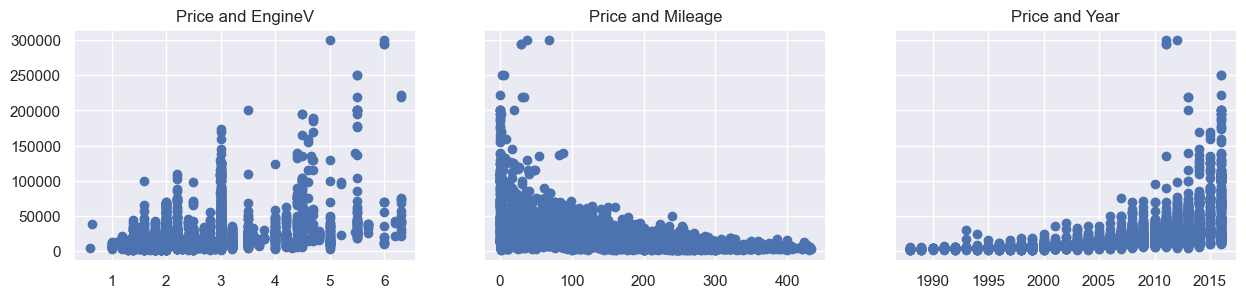

In [51]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax1.set_title('Price and EngineV')
ax2.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax2.set_title('Price and Mileage')
ax3.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax3.set_title('Price and Year')
plt.show()

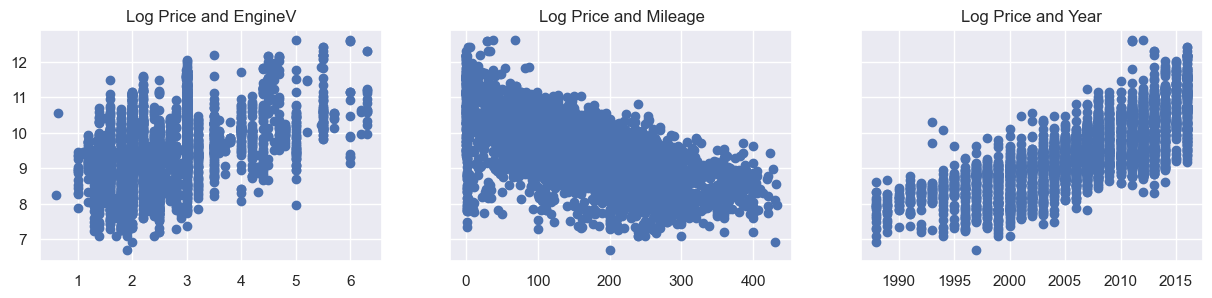

In [52]:
log_y = np.log(data_cleaned['Price'])
data_cleaned['log_y'] = log_y
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['EngineV'],data_cleaned['log_y'])
ax1.set_title('Log Price and EngineV')
ax2.scatter(data_cleaned['Mileage'],data_cleaned['log_y'])
ax2.set_title('Log Price and Mileage')
ax3.scatter(data_cleaned['Year'],data_cleaned['log_y'])
ax3.set_title('Log Price and Year')
plt.show()

In [53]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### MULTICOLLINEARITY

In [54]:
variables = data_cleaned[['EngineV','Mileage','Year']]
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range (variables.shape[1])]
vif['features']=variables.columns
vif

,VIF,features
0,7.400348,EngineV
1,3.703266,Mileage
2,10.323287,Year


In [55]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

In [56]:
data_no_multicollinearity.to_csv('data_no_multicollinearity.csv',index=False)

In [57]:
data_no_multicollinearity = pd.read_csv('data_no_multicollinearity.csv')
data_no_multicollinearity.head()

,Brand,Mileage,EngineV,log_y
0,BMW,277,2.0,8.342840
1,Mercedes-Benz,427,2.9,8.974618
2,Mercedes-Benz,358,5.0,9.495519
3,Audi,240,4.2,10.043249
4,Toyota,120,2.0,9.814656


In [58]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first = True)

In [59]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_y', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen'], dtype=object)

In [60]:
cols = ['log_y','Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen']

In [61]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_y,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen
0,8.342840,277,2.0,True,False,False,False,False,False
1,8.974618,427,2.9,False,True,False,False,False,False
2,9.495519,358,5.0,False,True,False,False,False,False
3,10.043249,240,4.2,False,False,False,False,False,False
4,9.814656,120,2.0,False,False,False,False,True,False


In [62]:
targets = data_preprocessed['log_y']
inputs = data_preprocessed.drop(['log_y'], axis=1)

In [63]:
scaler = StandardScaler()
scaler.fit(inputs)
input_scaled = scaler.transform(inputs)

In [88]:
x_train, x_test, y_train, y_test = train_test_split(input_scaled,targets,test_size=0.2,random_state=365)

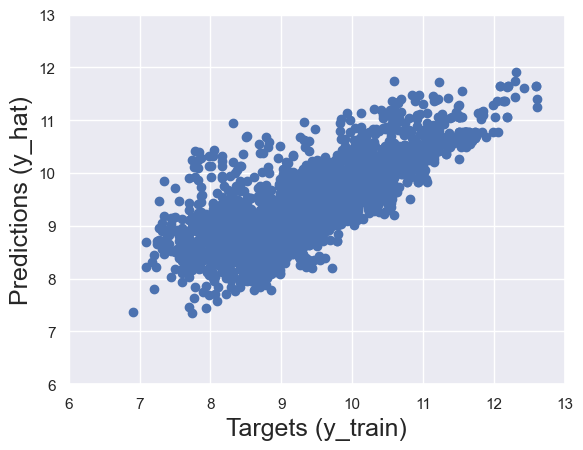

In [89]:
reg = LinearRegression()
reg.fit(x_train,y_train)
y_hat = reg.predict(x_train)
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

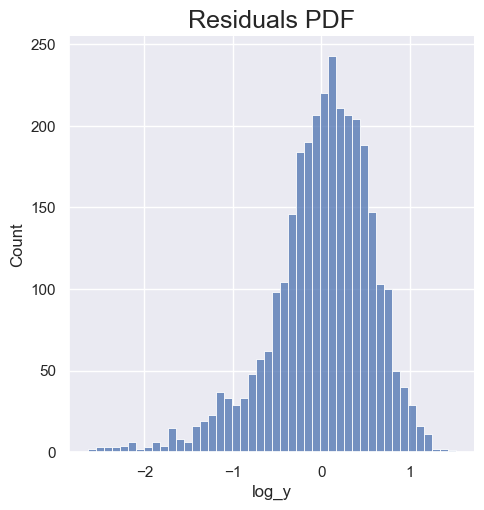

In [90]:
sns.displot(y_train - y_hat)
plt.title('Residuals PDF',size=18)

In [91]:
reg.score(x_train,y_train)

0.6015111063217435

In [92]:
reg.intercept_

9.438581494264783

In [93]:
reg.coef_
reg_summary = pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.574846
1,EngineV,0.339454
2,Brand_BMW,0.040654
3,Brand_Mercedes-Benz,0.081569
4,Brand_Mitsubishi,-0.080584
5,Brand_Renault,-0.093391
6,Brand_Toyota,-0.008705
7,Brand_Volkswagen,-0.005250


### TESTING

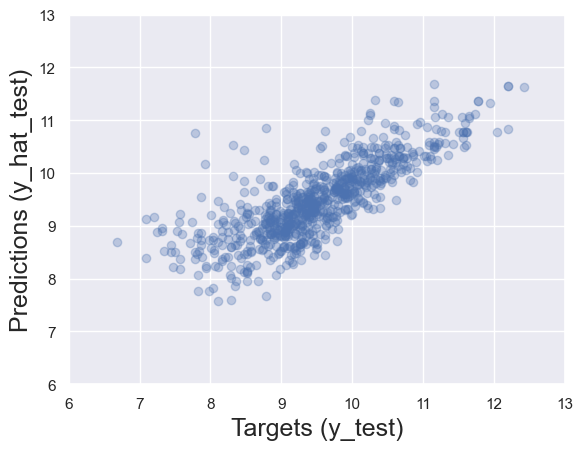

In [94]:
y_hat_test = reg.predict(x_test)
plt.scatter(y_test,y_hat_test,alpha=0.3)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

### PREDICTIONS

In [95]:
df_pf = pd.DataFrame(np.exp(y_hat_test),columns=['Predictions'])
df_pf.head()

,Predictions
0,4948.511543
1,6714.388660
2,15926.598919
3,6020.952870
4,15257.141018


In [96]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7.495542
1    9.287301
2    9.609116
3    9.305651
4    9.740910
Name: log_y, dtype: float64

In [97]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,4948.511543,1800.0
1,6714.388660,10800.0
2,15926.598919,14900.0
3,6020.952870,11000.0
4,15257.141018,16999.0
...,...,...
777,4295.913757,1950.0
778,23324.288598,21335.0
779,5718.988828,13500.0
780,6251.084356,6200.0


In [104]:
df_pf['Residuals'] = df_pf['Target']-df_pf['Predictions']
df_pf['Difference%']=np.absolute(df_pf['Residuals']/df_pf['Target']*100)
df_pf.describe()

,Predictions,Target,Residuals,Difference%
count,782.000000,782.000000,782.000000,782.000000
mean,17216.675005,20717.216803,3500.541798,52.086658
std,15614.764130,25654.851301,16233.025722,106.072792
min,1951.026332,800.000000,-57927.319935,0.016994
25%,7682.671514,7500.000000,-2306.751752,13.809659
50%,12343.333489,12500.000000,918.975186,29.971860
75%,20420.784497,23324.750000,5211.672477,50.615055
max,119621.898574,249999.000000,149135.007212,1860.653378


In [105]:
df_pf.sort_values(by=['Difference%'])

,Predictions,Target,Residuals,Difference%
354,8698.521540,8700.0,1.478460,0.016994
136,32011.605211,32000.0,-11.605211,0.036266
703,21590.960406,21600.0,9.039594,0.041850
383,19513.058731,19500.0,-13.058731,0.066968
267,14486.221730,14500.0,13.778270,0.095023
...,...,...,...,...
632,9276.380554,1200.0,-8076.380554,673.031713
88,51633.780501,6500.0,-45133.780501,694.365854
366,37390.374439,4100.0,-33290.374439,811.960352
772,26199.338094,2750.0,-23449.338094,852.703203


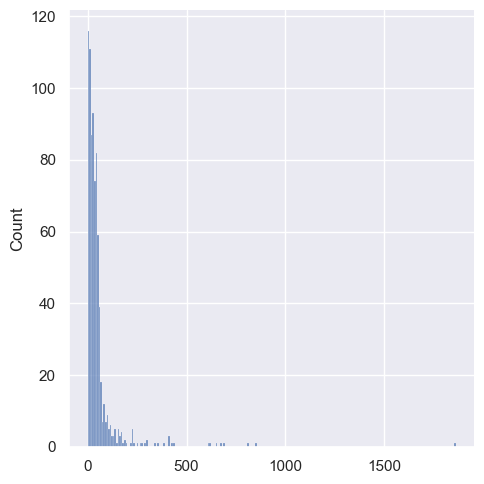

In [107]:
sns.displot(df_pf['Difference%'].values)

In [111]:
q = df_pf['Difference%'].quantile(0.75)
# data_2 = data_1[data_1['Mileage']<q]
q

50.615054756805435